Previously, a feature layer has been processed to take a set of reference lines and subdivide them over the where the 2d HEC-RAS mesh intersects. 

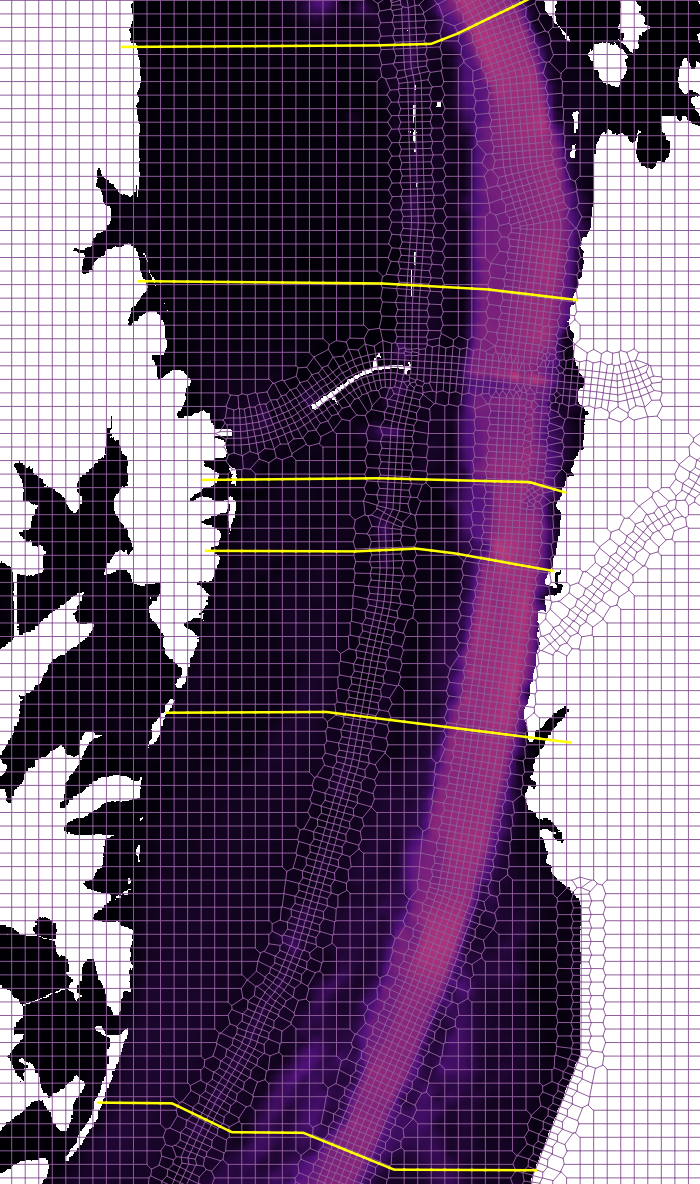



Then the widths of each Reference Line **"Segment"** were computed, and the centroid of each Segment found.

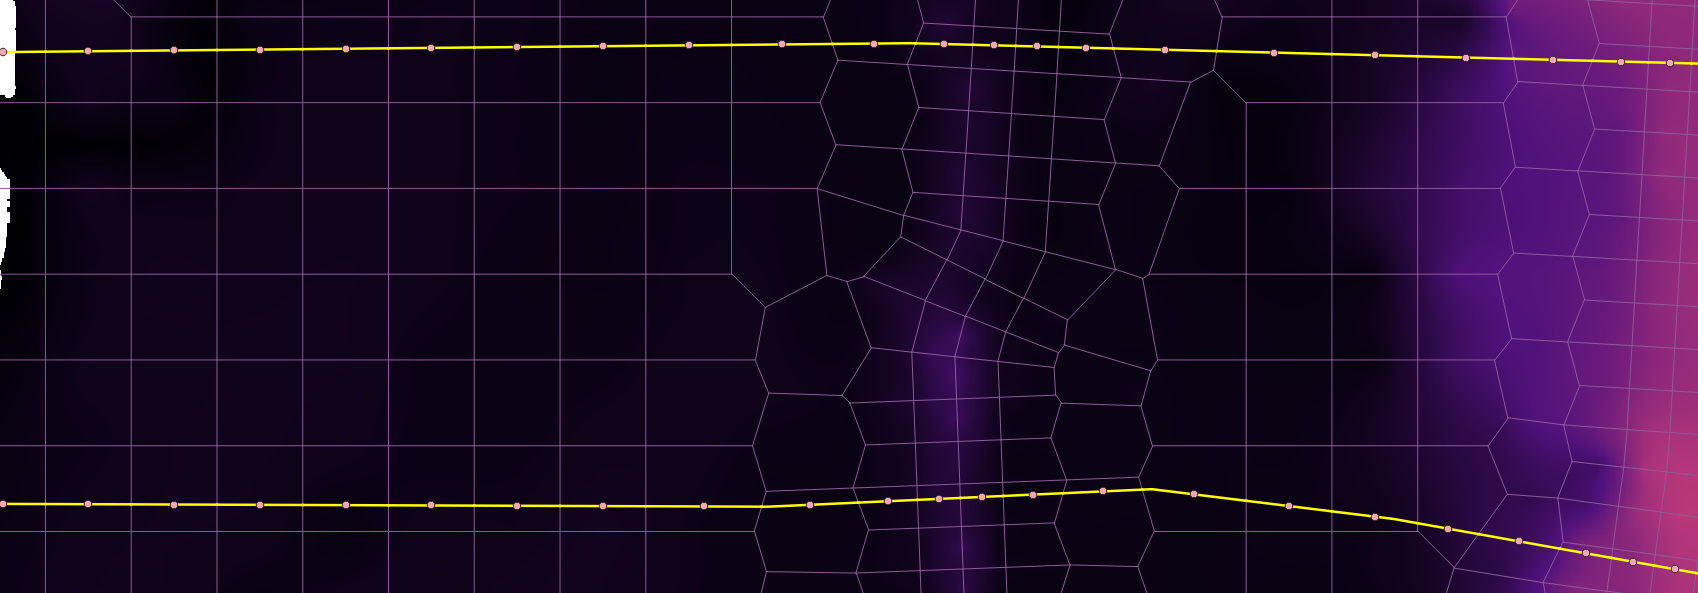



#### Using the RAS Stored raster maps for:
1. WSE Proposed Minus Existing
2. Depth
3. Velocity

The centroids of each reference line segment were used to sample each of the three rasters and extract values. Now We can perform the No Rise computation for the change in Base Flood Elevation (ΔBFE).

$$\overline{\Delta}_{BFE} = \frac{\Delta_{S1} q_{S1} + \Delta_{S2} q_{S2} + \Delta_{S3} q_{S3}}{q_{S1} + q_{S2} + q_{S3}}$$

$\Delta{S}$ = Surcharge = Proposed - Existing 100yr WSE

q = Depth * Velocity * Segment Length


In [ ]:
# Input Rasters
surcharge_raster = r"C:\Users\MBMcmanus\OneDrive - Garver\Documents\Work\ArkansasRiverWest\GIS\WSEL_Prop_minus_exist.tif"
depth_raster = r"C:\Users\MBMcmanus\OneDrive - Garver\Documents\Work\ArkansasRiverWest\RAS_ArkansasRiverWest\PR 100YR\Depth (Max).Proposed_Surface_1m.Proposed_Surface_1m.tif"
velocity_raster = r"C:\Users\MBMcmanus\OneDrive - Garver\Documents\Work\ArkansasRiverWest\RAS_ArkansasRiverWest\PR 100YR\Velocity (Max).Proposed_Surface_1m.Proposed_Surface_1m.tif"

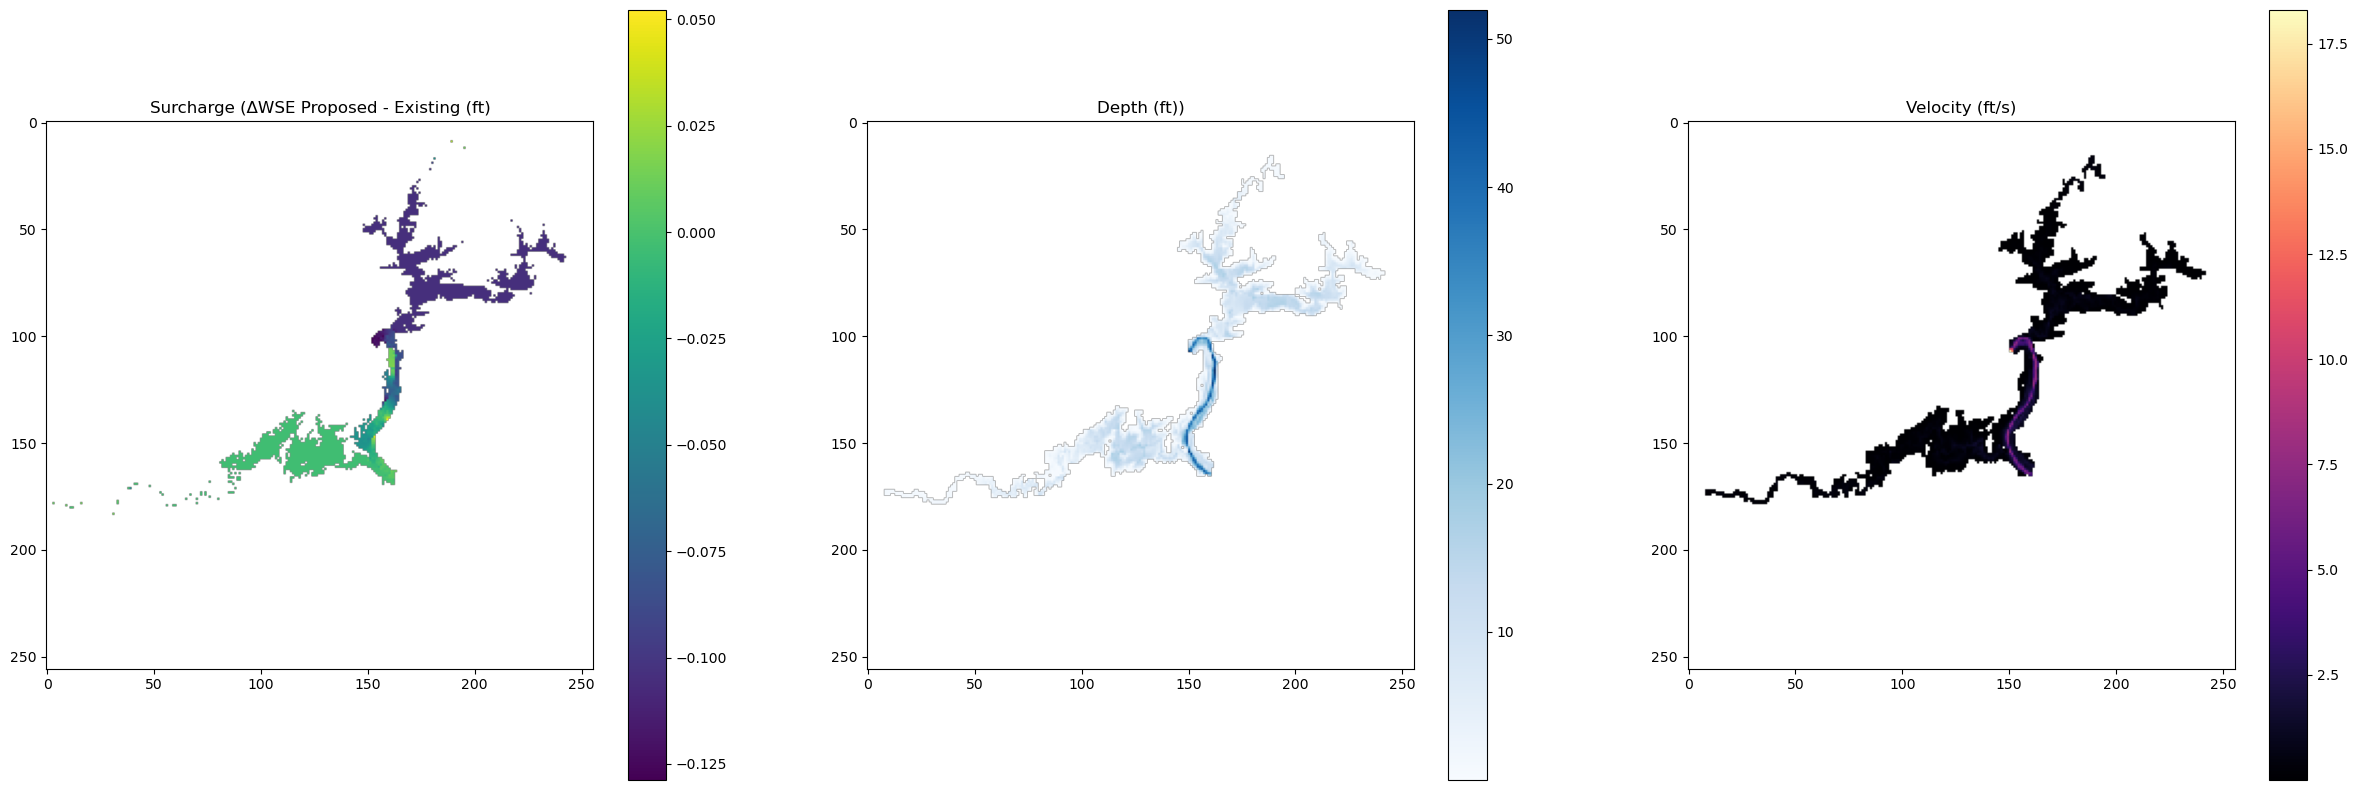

In [ ]:
import rasterio
import matplotlib.pyplot as plt
# plot all the rasters
# open the surcharge raster
with rasterio.open(surcharge_raster) as s:
    # open the depth raster
    with rasterio.open(depth_raster) as d:
        # open the velocity raster
        with rasterio.open(velocity_raster) as v:
            # read the data from the rasters, set the nodata values to None, and plot them.
            fig, ax = plt.subplots(1, 3, figsize=(30, 10))
            surcharge_data = s.read(1, out_shape=(256, 256))
            surcharge_data[surcharge_data == s.nodata] = None
            im0 = ax[0].imshow(surcharge_data, cmap='viridis')
            fig.colorbar(im0, ax=ax[0], orientation='vertical')
            depth_data = d.read(1, out_shape=(256, 256))
            depth_data[depth_data == d.nodata] = None
            im1 = ax[1].imshow(depth_data, cmap='Blues')
            fig.colorbar(im1, ax=ax[1], orientation='vertical')
            velocity_data = v.read(1, out_shape=(256, 256))
            velocity_data[velocity_data == v.nodata] = None
            im2 = ax[2].imshow(velocity_data, cmap='magma')
            fig.colorbar(im2, ax=ax[2], orientation='vertical')
            
            # set the titles for the subplots
            ax[0].set_title('Surcharge (ΔWSE Proposed - Existing (ft)')
            ax[1].set_title('Depth (ft))')
            ax[2].set_title('Velocity (ft/s)')
            
            plt.show()

### The preprocessed feature layer was created in QGIS using the "Sample Raster Values" tool to get the raster values at the reference line segment centroids for each raster layer to produce the fields needed for the change in the Base Flood Elevation (ΔBFE) computation.

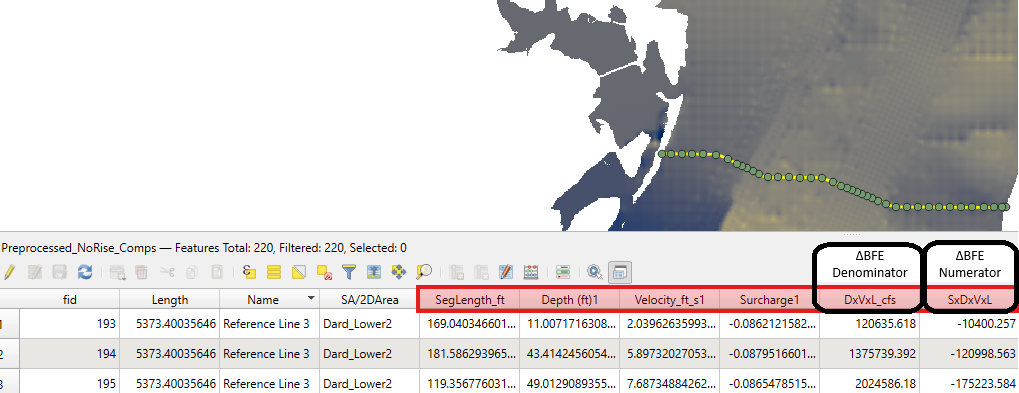


$$\overline{\Delta}_{BFE} = \frac{\Delta_{S1} q_{S1} + \Delta_{S2} q_{S2} + \Delta_{S3} q_{S3}}{q_{S1} + q_{S2} + q_{S3}}$$

$\Delta{S}$ = Surcharge = Proposed - Existing 100yr WSE

q = Depth * Velocity * Segment Length

In [ ]:
# Preprocessed Feature Layer already contains the necessary fields to perform the calculation for the no rise calculation
import geopandas as gpd

comp_layer_name = r"C:\Users\MBMcmanus\OneDrive - Garver\Documents\Work\ArkansasRiverWest\GIS\Preprocessed_NoRise_Comps.gpkg"
gdf = gpd.read_file(comp_layer_name)

gdf

,Length,Name,SA/2DArea,SegLength_ft,Depth (ft)1,Velocity_ft_s1,DxVxL_cfs,Surcharge1,SxDxVxL,geometry
0,6482.955989,Reference Line 1,Dard_Lower2,7.001052,NaN,NaN,NaN,NaN,NaN,POINT (1026852.805 4401234.978)
1,6482.955989,Reference Line 1,Dard_Lower2,218.289192,21.354065,5.263776,728703.838,-0.093933,-68449.414,POINT (1026740.951 4401248.304)
2,6482.955989,Reference Line 1,Dard_Lower2,139.394122,44.043732,7.890471,2252994.517,-0.085938,-193616.716,POINT (1026563.365 4401269.462)
3,6482.955989,Reference Line 1,Dard_Lower2,100.006186,55.668091,8.872329,3201968.288,-0.086365,-276537.178,POINT (1026444.505 4401283.623)
4,6482.955989,Reference Line 1,Dard_Lower2,100.006186,49.074219,8.736961,2779629.313,-0.086517,-240486.118,POINT (1026345.201 4401295.454)
...,...,...,...,...,...,...,...,...,...,...
215,5373.400356,Reference Line 3,Dard_Lower2,200.009642,14.163544,0.513476,39078.788,0.009918,387.592,POINT (1022203.532 4398583.669)
216,5373.400356,Reference Line 3,Dard_Lower2,200.009642,14.290680,1.120470,86040.376,0.011292,971.525,POINT (1022003.532 4398581.705)
217,5373.400356,Reference Line 3,Dard_Lower2,200.009642,NaN,NaN,NaN,NaN,NaN,POINT (1021803.532 4398579.741)
218,5373.400356,Reference Line 3,Dard_Lower2,200.009642,3.885254,0.073001,1524.047,0.016205,24.697,POINT (1021603.532 4398577.777)


In [7]:
# Run the No Rise Calculation for each unique name in the "Name" field
# for each results append to a df
import pandas as pd
results_df = pd.DataFrame(columns=["Name", "delta_BFE"])
for name in gdf["Name"].unique():
    # Filter the GeoDataFrame for the current name
    filtered_gdf = gdf[gdf["Name"] == name]
    # Calculate the sum of the field "SxDxVxL"
    filtered_numerator = filtered_gdf["SxDxVxL"].sum()
    filtered_denominator = filtered_gdf["DxVxL_cfs"].sum()
    # Calculate the BFE for the current name
    filtered_bfe = filtered_numerator / filtered_denominator
    filtered_bfe = filtered_bfe.round(2)
    # print(f"The change in BFE for {name} is {filtered_bfe} feet.")
    # Append the results to the results_df DataFrame
    results_df = pd.concat([results_df, pd.DataFrame({"Name": [name], "delta_BFE": [filtered_bfe]})], ignore_index=True)

results_df

C:\Users\MBMcmanus\AppData\Local\Temp\ipykernel_30180\648527178.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame({"Name": [name], "delta_BFE": [filtered_bfe]})], ignore_index=True)


,Name,delta_BFE
0,Reference Line 1,-0.09
1,Reference Line 2,-0.08
2,FEMA Letter I,-0.07
3,FEMA Letter J,-0.08
4,FEMA Letter K,-0.09
5,Reference Line 3,-0.09


In [18]:
# Create a folium map of the reference lines in gdf and label them with name and delta_BFE from results_df
import folium
# open reference lines in gdf
gdf_lines = gpd.read_file(r"C:\Users\MBMcmanus\OneDrive - Garver\Documents\Work\ArkansasRiverWest\GIS\refLines_split.gpkg")
# reproject the gdf to WGS84
gdf_lines = gdf_lines.to_crs(epsg=4326)
gdf_lines
# Create a folium map centered on the first line in the gdf_lines
m = folium.Map(location=[gdf_lines.geometry[0].centroid.y, gdf_lines.geometry[0].centroid.x], zoom_start=12)
# Add the lines to the map as a line layer
for i, row in gdf_lines.iterrows():
    # Get the name and delta_BFE for the current line from results_df
    name = row["Name"]
    delta_bfe = results_df[results_df["Name"] == name]["delta_BFE"].values[0]
    # Create a folium feature group for the line
    fg = folium.FeatureGroup(name=name)
    # Add the line to the feature group
    folium.GeoJson(row.geometry).add_to(fg)
    # Add a popup with the name and delta_BFE to the feature group
    fg.add_child(folium.Popup(f"<b>{name}</b><br>{delta_bfe} ft", sticky=False, max_width=200))
    # Add the feature group to the map
    m.add_child(fg)

m